In [99]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [100]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [101]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_city,distance_from_airport,sqft_living_comparison,sqft_lot_comparison
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,-122.319,1690,7639,69,29,True,12.613856,30.859494,1.520710,0.948030
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,-122.233,2720,8062,87,87,False,16.333282,33.112379,0.283088,1.240387
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,-122.393,1360,5000,55,55,True,10.617501,10.988905,1.441176,1.000000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,-122.045,1800,7503,33,33,False,21.759524,27.230991,0.933333,1.076903
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,-122.005,4760,101930,19,19,True,25.295727,32.449837,1.138655,1.000000


In [102]:
df.shape

(19221, 28)

In [103]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'distance_from_city',
       'distance_from_airport', 'sqft_living_comparison',
       'sqft_lot_comparison'],
      dtype='object')

In [104]:
categoricals = ['floors','view','condition','grade','waterfront','basement','zipcode']

In [105]:
numericals = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_city',
 'distance_from_airport']

In [106]:
df[numericals].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 11 columns):
price                    19221 non-null float64
bedrooms                 19221 non-null int64
bathrooms                19221 non-null float64
sqft_living              19221 non-null int64
sqft_lot                 19221 non-null int64
sqft_living15            19221 non-null int64
sqft_lot15               19221 non-null int64
Age_of_House             19221 non-null int64
Years_last_renovation    19221 non-null int64
distance_from_city       19221 non-null float64
distance_from_airport    19221 non-null float64
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [84]:
totransform = ['bathrooms','bedrooms','distance_from_city','sqft_lot']

In [85]:
nottransform = ['Age_of_House','distance_from_airport','Years_last_renovation']

In [107]:
def remove_outliers(df, col, threshold = 4):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


In [87]:
to_remove = remove_outliers(df,'price')

In [88]:
df.shape

(19221, 28)

In [89]:
to_remove

array([  139,   221,   243,   254,   268,   278,   463,   482,   579,
         690,   722,   911,  1032,  1132,  1142,  1172,  1211,  1275,
        1289,  1486,  1568,  1723,  1807,  1851,  2016,  2168,  2320,
        2537,  2568,  2632,  2670,  2952,  2989,  3106,  3288,  3301,
        3361,  3400,  3408,  3451,  3534,  3551,  3554,  3655,  3695,
        3834,  3894,  3898,  4100,  4256,  4303,  4827,  4971,  5048,
        5197,  5276,  5342,  5346,  5471,  5505,  5660,  5752,  5936,
        5984,  5996,  6187,  6219,  6358,  6415,  6467,  6469,  6572,
        6638,  6762,  6987,  7057,  7148,  7240,  7268,  7628,  8183,
        8245,  8392,  9086,  9185,  9251,  9270,  9961,  9992, 10013,
       10119, 10161, 10315, 10428, 10605, 10628, 10824, 10990, 11240,
       11297, 11356, 11444, 11575, 11621, 11788, 11927, 12029, 12188,
       12196, 12426, 12483, 12504, 12534, 12584, 12625, 12668, 12800,
       12915, 12956, 13012, 13187, 13366, 13484, 13510, 13569, 13575,
       13578, 13782,

In [95]:
all_indices = []
for col in numericals:
    indices = remove_outliers(df, col, threshold = 4)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [96]:
list_indices = list(all_indices)

In [97]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_city,distance_from_airport,sqft_living_comparison,sqft_lot_comparison
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,-122.331,1330,4700,73,73,True,8.871826,27.231767,1.218045,1.276596


In [98]:
df.drop(index = list_indices,inplace = True)

KeyError: '[  371  1357  1497  2021  2537  2619  2952  3554  3708  3834  4059  5276\n  5342  5516  6158  6187  6438  6493  6897  7628  7742  8044  8256  8392\n  8950  9136  9270  9672  9678 11361 11622 11659 11826 12103 12534 12584\n 12768 14488 14616 15045 15068 15183 16105 16305 16392 16986 17038 17333\n 17672 17934 18875 19025 19127 19139] not found in axis'

In [364]:
data_log = pd.DataFrame([])

for name in totransform:
    title = name + '_log'
    data_log[title] = df[name].map(lambda x: np.log(x))    
data_log

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)
data_log_norm

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log
0,-1.727276,-0.267365,-0.325988,-0.356548
1,0.375566,-0.267365,-0.281628,-0.041963
2,-1.727276,-1.717368,0.111767,0.366964
3,1.121561,0.761429,-0.543921,-0.511428
4,0.070140,-0.267365,0.548454,0.096794
...,...,...,...,...
21592,0.648778,-0.267365,-0.608484,-2.394990
21593,0.648778,0.761429,-0.490106,-0.320505
21594,-2.473272,-1.717368,-2.416336,-2.170683
21595,0.648778,-0.267365,0.534622,-1.447904


In [365]:
floor_dummies = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
water_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
base_dummies = pd.get_dummies(df['basement'], prefix='base', drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'],prefix='zip',drop_first=True)

In [366]:
dfnew  = pd.concat([data_log_norm,floor_dummies,view_dummies,cond_dummies,grade_dummies,water_dummies,base_dummies,zipcode_dummies],axis = 1)

In [367]:
datanottransform = df[nottransform].apply(normalize)

In [368]:
dfnew = pd.concat([dfnew,datanottransform],axis = 1)

In [369]:
dfnew.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,...,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Age_of_House,distance_from_airport,Years_last_renovation
0,-1.727276,-0.267365,-0.325988,-0.356548,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.535396,-1.389968,0.608127
1,0.375566,-0.267365,-0.281628,-0.041963,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.671615,0.993080,-0.634569
2,-1.727276,-1.717368,0.111767,0.366964,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.284598,1.230350,1.367553
3,1.121561,0.761429,-0.543921,-0.511428,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.194850,-1.099655,0.262934
4,0.070140,-0.267365,0.548454,0.096794,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.554351,0.610933,-0.496491


In [370]:
dfnew['price'] = df.price

In [371]:
dfnew.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,sqft_lot_log,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_1.0,...,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,Age_of_House,distance_from_airport,Years_last_renovation,price
0,-1.727276,-0.267365,-0.325988,-0.356548,0,0,0,0,0,0,...,0,0,1,0,0,0,0.535396,-1.389968,0.608127,221900.0
1,0.375566,-0.267365,-0.281628,-0.041963,0,1,0,0,0,0,...,0,0,0,0,0,0,0.671615,0.993080,-0.634569,538000.0
2,-1.727276,-1.717368,0.111767,0.366964,0,0,0,0,0,0,...,0,0,0,0,0,0,1.284598,1.230350,1.367553,180000.0
3,1.121561,0.761429,-0.543921,-0.511428,0,0,0,0,0,0,...,0,0,0,0,0,0,0.194850,-1.099655,0.262934,604000.0
4,0.070140,-0.267365,0.548454,0.096794,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.554351,0.610933,-0.496491,510000.0


In [391]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
modeldata = ['distance_from_city','Age_of_House','bedrooms']

In [402]:
data_log = pd.DataFrame([])

for name in modeldata:
    title = name + '_log'
    data_log[title] = df[name].map(lambda x: np.log(x))    
data_log

# def normalize(feature):
#     return (feature - feature.mean()) / feature.std()

# data_log_norm = data_log.apply(normalize)
# data_log_norm

,distance_from_city_log,sqft_living_log
0,2.505658,7.073270
1,2.534796,7.851661
2,2.793205,6.646391
3,2.362504,7.580700
4,3.080052,7.426549
...,...,...
21592,2.320095,7.333023
21593,2.397853,7.745003
21594,1.132572,6.927558
21595,3.070966,7.377759


In [13]:
df['waterfront'].dropna(inplace=True)

In [63]:
X = df[modeldata]
y = df['price']

In [64]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                          1.711e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:59:39   Log-Likelihood:                     -2.7225e+05
No. Observations:               19221   AIC:                                  5.445e+05
Df Residuals:                   19218   BIC:                                  5.445e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
distance_from_city -8004.6636    215.402    -37.162      0.000   -8426.870   -7582.458
Age_of_House         139.2447     73.549      1.893      0.058      -4.918     283.407
bedrooms            1.974e+05   1706.735    115.670      0.000    1.94e+05    2.01e+05
==============================================================================
Omnibus:                    15647.395   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1248217.639
Skew:                           3.393   Prob(JB):                         0.00
Kurtosis:                      41.891   Cond. No.                         40.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('distance_from_city', 3.4852548662487166),
 ('sqft_living', 2.881107030611114),
 ('waterfront', 5.829097114622086)]

In [66]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

3 2
['distance_from_city', 'bedrooms']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
distance_from_city,-8004.6636,215.402,-37.162,0.000,-8426.870,-7582.458
Age_of_House,139.2447,73.549,1.893,0.058,-4.918,283.407
bedrooms,1.974e+05,1706.735,115.670,0.000,1.94e+05,2.01e+05


In [71]:
X = df[x_cols]
y= df['price']

In [72]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                          2.566e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:00:05   Log-Likelihood:                     -2.7226e+05
No. Observations:               19221   AIC:                                  5.445e+05
Df Residuals:                   19219   BIC:                                  5.445e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
distance_from_city -8051.0586    214.017    -37.619      0.000   -8470.552   -7631.566
bedrooms            1.995e+05   1311.243    152.136      0.000    1.97e+05    2.02e+05
==============================================================================
Omnibus:                    15584.962   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1250347.759
Skew:                           3.369   Prob(JB):                         0.00
Kurtosis:                      41.934   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

2 2
['distance_from_city', 'bedrooms']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
distance_from_city,-8051.0586,214.017,-37.619,0.0,-8470.552,-7631.566
bedrooms,1.995e+05,1311.243,152.136,0.0,1.97e+05,2.02e+05


In [74]:
X = dfnew[x_cols]
model = sm.OLS(y,X).fit()
model.summary()

NameError: name 'dfnew' is not defined

In [55]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('distance_from_city', 2.86316082038757),
 ('sqft_living', 2.8945632378258117),
 ('waterfront', 1.0187058918252687)]

In [56]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

3 3


In [59]:
X = df[x_cols]

In [60]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          4.718e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:58:46   Log-Likelihood:                     -2.6434e+05
No. Observations:               19221   AIC:                                  5.287e+05
Df Residuals:                   19218   BIC:                                  5.287e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
distance_from_city -8939.7343    129.336    -69.120      0.000   -9193.245   -8686.224
sqft_living          328.1079      1.224    267.978      0.000     325.708     330.508
waterfront          8.021e+05    1.9e+04     42.254      0.000    7.65e+05    8.39e+05
==============================================================================
Omnibus:                     9880.492   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           328834.391
Skew:                           1.858   Prob(JB):                         0.00
Kurtosis:                      22.919   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 15
['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'floor_1.5', 'floor_2.0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bathrooms_log,-5.437e+04,2759.808,-19.702,0.0,-5.98e+04,-4.9e+04
bedrooms_log,3.496e+04,2527.895,13.830,0.0,3e+04,3.99e+04
distance_from_city_log,-4.886e+04,2274.722,-21.479,0.0,-5.33e+04,-4.44e+04
floor_1.5,3.055e+05,7447.323,41.023,0.0,2.91e+05,3.2e+05
floor_2.0,5.039e+05,3926.002,128.347,0.0,4.96e+05,5.12e+05


In [194]:
X = dfnew[x_cols]

In [195]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.738
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              3897.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:05:23   Log-Likelihood:                     -2.9113e+05
No. Observations:               20754   AIC:                                  5.823e+05
Df Residuals:                   20739   BIC:                                  5.824e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms_log          -5.437e+04   2759.808    -19.702      0.000   -5.98e+04    -4.9e+04
bedrooms_log            3.496e+04   2527.895     13.830      0.000       3e+04    3.99e+04
distance_from_city_log -4.886e+04   2274.722    -21.479      0.000   -5.33e+04   -4.44e+04
floor_1.5               3.055e+05   7447.323     41.023      0.000    2.91e+05     3.2e+05
floor_2.0               5.039e+05   3926.002    128.347      0.000    4.96e+05    5.12e+05
floor_3.0               4.303e+05   1.27e+04     33.788      0.000    4.05e+05    4.55e+05
view_1.0                2.867e+05   1.72e+04     16.641      0.000    2.53e+05     3.2e+05
view_2.0                2.524e+05   1.04e+04     24.234      0.000    2.32e+05    2.73e+05
view_3.0                3.703e+05   1.46e+04     25.373      0.000    3.42e+05    3.99e+05
view_4.0                5.673e+05   1.96e+04     28.907      0.000    5.29e+05    6.06e+05
grade_4                 1.691e+05    5.8e+04      2.916      0.004    5.54e+04    2.83e+05
grade_12                 8.75e+05   5.31e+04     16.464      0.000    7.71e+05    9.79e+05
water_True              1.179e+05   6471.472     18.226      0.000    1.05e+05    1.31e+05
base_True               3.558e+05   3797.244     93.699      0.000    3.48e+05    3.63e+05
distance_from_airport   6.178e+04   2122.990     29.100      0.000    5.76e+04    6.59e+04
==============================================================================
Omnibus:                     1879.749   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4362.408
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
resids = model.resid

In [200]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(x, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

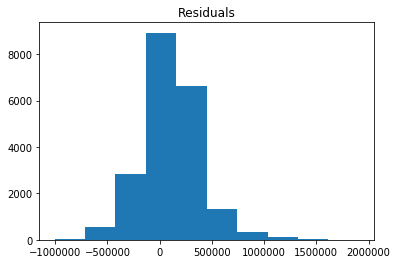

NameError: name 'x' is not defined

In [201]:
plot_residuals(resids)

In [202]:
finaldf = dfnew[x_cols]

In [206]:
finaldf['price']=dfnew['price']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
finaldf.head()

,bathrooms_log,bedrooms_log,distance_from_city_log,floor_1.5,floor_2.0,floor_3.0,view_1.0,view_2.0,view_3.0,view_4.0,grade_4,grade_12,water_True,base_True,distance_from_airport,price
0,-1.725633,-0.263045,-0.327227,0,0,0,0,0,0,0,0,0,1,0,-1.391529,221900.0
1,0.381165,-0.263045,-0.282862,0,1,0,0,0,0,0,0,0,0,1,0.992174,538000.0
2,-1.725633,-1.715623,0.110589,0,0,0,0,0,0,0,0,0,0,0,1.229509,180000.0
3,1.128563,0.767575,-0.545192,0,0,0,0,0,0,0,0,0,0,1,-1.101136,604000.0
4,0.075164,-0.263045,0.547339,0,0,0,0,0,0,0,0,0,0,0,0.609922,510000.0


In [210]:
X = finaldf.drop(columns='price',axis=1)
y = finaldf['price']

In [211]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [213]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [214]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [215]:
ols.coef_

array([-53332.5132314 ,  36172.48361048, -47234.35240599, 310484.13266737,
       501916.52704855, 434467.40154718, 278928.51987673, 254338.34851773,
       366880.15857828, 566205.4573405 , 174126.64140848, 884070.05869901,
       117738.89663688, 356520.35516341,  62293.37376362])

In [216]:
y_train_preds = ols.predict(X_train)
y_train_preds


array([443858.76562084, 493749.3453514 , 109642.63657952, ...,
        93883.35178784, 478668.88883879,  69928.77523556])

In [217]:
r2_score(y_train, y_train_preds)

-0.13966763739390875

In [218]:
def get_score(model ,X_train, y_train):
    y_train_preds = model.predict(X_train)

In [219]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

-0.13966763739390875

In [220]:
testing_score = ols.score(X_test, y_test)
testing_score

-0.13586864337811644

In [221]:
# cv = 5 means 80/20 splits
# cv = 10 means 90/10 splits
# cv = 3 means 67/33 splits

cv_scores = cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) 
# cv breaks your data into that many equal pieces 
cv_scores

array([-0.15329018, -0.16789171, -0.14617542, -0.07656858, -0.21379668])

In [230]:
rfe = RFE(ols, n_features_to_select=15, step=1, verbose=2)

In [231]:
X_all = finaldf.drop(columns=['price'])
rfe.fit(X_all, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=2)

In [232]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [233]:
new_cols = X_all.columns[rfe.support_]

In [234]:
new_cols

Index(['bathrooms_log', 'bedrooms_log', 'distance_from_city_log', 'floor_1.5',
       'floor_2.0', 'floor_3.0', 'view_1.0', 'view_2.0', 'view_3.0',
       'view_4.0', 'grade_4', 'grade_12', 'water_True', 'base_True',
       'distance_from_airport'],
      dtype='object')